In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [22]:
def softmax(z):
    # Numerical stabilization: subtract max value per row
    shifted_z = z - np.max(z, axis=1, keepdims=True)
    exp_z = np.exp(shifted_z)
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

# Test case for softmax
z_test = np.array([[2.0, 1.0, 0.1], [1.0, 1.0, 1.0]])
softmax_output = softmax(z_test)
row_sums = np.sum(softmax_output, axis=1)
assert np.allclose(row_sums, 1), f"Test failed: Row sums are {row_sums}"
print("Softmax function passed the test case!")

Softmax function passed the test case!


In [23]:
# 2. Prediction Function
def predict_softmax(X, W, b):
    # Compute logits (XW + b)
    logits = np.dot(X, W) + b
    # Apply softmax and get predicted class
    probabilities = softmax(logits)
    predicted_classes = np.argmax(probabilities, axis=1)
    return predicted_classes

# Test case for prediction
X_test = np.array([[0.2, 0.8], [0.5, 0.5], [0.9, 0.1]])
W_test = np.array([[0.4, 0.2, 0.1], [0.3, 0.7, 0.5]])
b_test = np.array([0.1, 0.2, 0.3])
y_pred_test = predict_softmax(X_test, W_test, b_test)
assert y_pred_test.shape == (3,), f"Test failed: Expected shape (3,), got {y_pred_test.shape}"
print("Predicted class labels:", y_pred_test)


Predicted class labels: [1 1 0]


In [24]:
# 3. Loss Function (Categorical Cross-Entropy)
def loss_softmax(y_pred, y):
    # Clip to avoid log(0)
    y_pred = np.clip(y_pred, 1e-10, 1.0)
    return -np.sum(y * np.log(y_pred)) / y.shape[0]

# Test case for loss
y_true_correct = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])
y_pred_correct = np.array([[0.9, 0.05, 0.05], [0.1, 0.85, 0.05], [0.05, 0.1, 0.85]])
y_pred_incorrect = np.array([[0.05, 0.05, 0.9], [0.1, 0.05, 0.85], [0.85, 0.1, 0.05]])
loss_correct = loss_softmax(y_pred_correct, y_true_correct)
loss_incorrect = loss_softmax(y_pred_incorrect, y_true_correct)
assert loss_correct < loss_incorrect, f"Test failed: {loss_correct} >= {loss_incorrect}"
print(f"Cross-Entropy Loss (Correct): {loss_correct:.4f}\nCross-Entropy Loss (Incorrect): {loss_incorrect:.4f}")

Cross-Entropy Loss (Correct): 0.1435
Cross-Entropy Loss (Incorrect): 2.9957


In [25]:
# 4. Cost Function
def cost_softmax(X, y, W, b):
    logits = np.dot(X, W) + b
    probabilities = softmax(logits)
    return loss_softmax(probabilities, y)

# Test case for cost
X_correct = np.array([[1.0, 0.0], [0.0, 1.0]])
y_correct = np.array([[1, 0], [0, 1]])
W_correct = np.array([[5.0, -2.0], [-3.0, 5.0]])
b_correct = np.array([0.1, 0.1])
cost_correct = cost_softmax(X_correct, y_correct, W_correct, b_correct)
X_incorrect = np.array([[0.1, 0.9], [0.8, 0.2]])
y_incorrect = np.array([[1, 0], [0, 1]])
W_incorrect = np.array([[0.1, 2.0], [1.5, 0.3]])
b_incorrect = np.array([0.5, 0.6])
cost_incorrect = cost_softmax(X_incorrect, y_incorrect, W_incorrect, b_incorrect)
assert cost_incorrect > cost_correct, f"Test failed: {cost_incorrect} ≤ {cost_correct}"
print(f"Cost (Correct): {cost_correct}\nCost (Incorrect): {cost_incorrect}")

Cost (Correct): 0.0006234364133349324
Cost (Incorrect): 0.29930861359446115


In [26]:
# 5. Gradient Descent
def compute_gradient_softmax(X, y, W, b):
    n = X.shape[0]
    logits = np.dot(X, W) + b
    y_pred = softmax(logits)
    grad_W = (X.T @ (y_pred - y)) / n
    grad_b = np.sum(y_pred - y, axis=0) / n
    return grad_W, grad_b

# Test case for gradient
X_test = np.array([[0.2, 0.8], [0.5, 0.5], [0.9, 0.1]])
y_test = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])
W_test = np.array([[0.4, 0.2, 0.1], [0.3, 0.7, 0.5]])
b_test = np.array([0.1, 0.2, 0.3])
grad_W, grad_b = compute_gradient_softmax(X_test, y_test, W_test, b_test)
z_test = np.dot(X_test, W_test) + b_test
y_pred_test = softmax(z_test)
grad_W_manual = (X_test.T @ (y_pred_test - y_test)) / X_test.shape[0]
grad_b_manual = np.sum(y_pred_test - y_test, axis=0) / X_test.shape[0]
assert np.allclose(grad_W, grad_W_manual) and np.allclose(grad_b, grad_b_manual), "Gradient test failed"
print("Gradient test passed!")

Gradient test passed!


In [27]:

def gradient_descent_softmax(X, y, W, b, alpha, n_iter, show_cost=False):
    cost_history = []
    for _ in range(n_iter):
        grad_W, grad_b = compute_gradient_softmax(X, y, W, b)
        W -= alpha * grad_W
        b -= alpha * grad_b
        cost = cost_softmax(X, y, W, b)
        cost_history.append(cost)
        if show_cost and _ % 100 == 0:
            print(f"Iteration {_}: Cost = {cost:.4f}")
    return W, b, cost_history

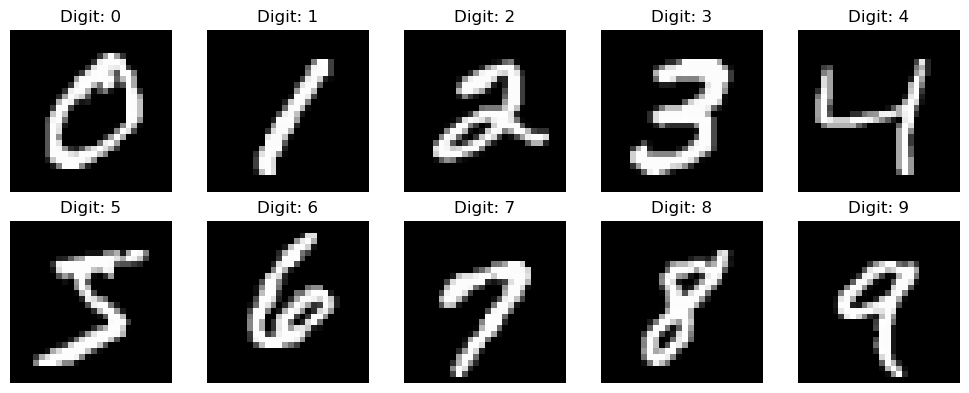

In [28]:
def plot_sample_images(X, y):
    plt.figure(figsize=(10, 4))
    unique_classes = np.unique(y)
    for i, digit in enumerate(unique_classes):
        index = np.where(y == digit)[0][0]
        image = X[index].reshape(28, 28)
        plt.subplot(2, 5, i + 1)
        plt.imshow(image, cmap='gray')
        plt.title(f"Digit: {digit}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

def load_and_prepare_mnist(csv_file, test_size=0.2, random_state=42):
    df = pd.read_csv(csv_file)
    y = df.iloc[:, 0].values
    X = df.iloc[:, 1:].values / 255.0
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    plot_sample_images(X, y)
    return X_train, X_test, y_train, y_test

# Load dataset (replace 'mnist.csv' with your file path)
X_train, X_test, y_train, y_test = load_and_prepare_mnist('mnist_dataset.csv')

Iteration 0: Cost = 2.2082
Iteration 100: Cost = 0.6076
Iteration 200: Cost = 0.4896
Iteration 300: Cost = 0.4410
Iteration 400: Cost = 0.4128
Iteration 500: Cost = 0.3940
Iteration 600: Cost = 0.3801
Iteration 700: Cost = 0.3694
Iteration 800: Cost = 0.3608
Iteration 900: Cost = 0.3536


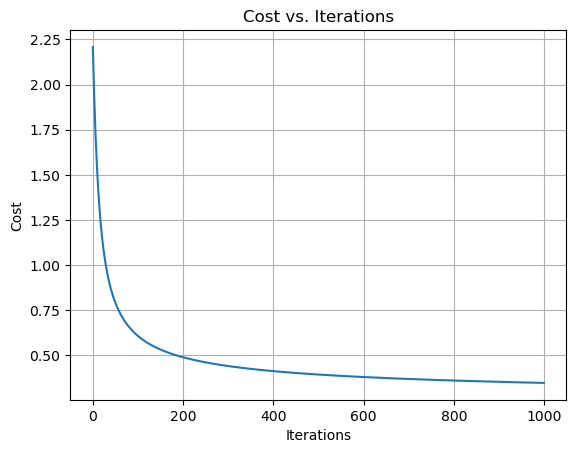

In [30]:
from sklearn.preprocessing import OneHotEncoder
# One-hot encode labels
encoder = OneHotEncoder(sparse_output=False)
y_train_onehot = encoder.fit_transform(y_train.reshape(-1, 1))
y_test_onehot = encoder.transform(y_test.reshape(-1, 1))

# Initialize parameters
d = X_train.shape[1]
c = y_train_onehot.shape[1]
W = np.random.randn(d, c) * 0.01
b = np.zeros(c)

# Train model
alpha = 0.1
n_iter = 1000
W_opt, b_opt, cost_history = gradient_descent_softmax(X_train, y_train_onehot, W, b, alpha, n_iter, show_cost=True)

# Plot cost history
plt.plot(cost_history)
plt.title('Cost vs. Iterations')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.grid(True)
plt.show()


Confusion Matrix:
[[1126    0    5    2    3   13    9    2   12    3]
 [   0 1275    7   11    1    5    1    4   17    1]
 [   1   15 1029   16   19    4   27   24   33    6]
 [   8    5   33 1052    1   53    9    8   29   21]
 [   1    5    7    1 1092    0   10    4    4   52]
 [  22   14   14   43   13  924   14    7   40   13]
 [   7    2    9    1    9   16 1121    2   10    0]
 [   6   27   24    4   16    2    0 1182    7   31]
 [   9   24   13   33    9   34   13    7 1003   15]
 [   8    6   10   18   45    9    0   38   10 1050]]
Precision: 0.90
Recall: 0.90
F1-Score: 0.90


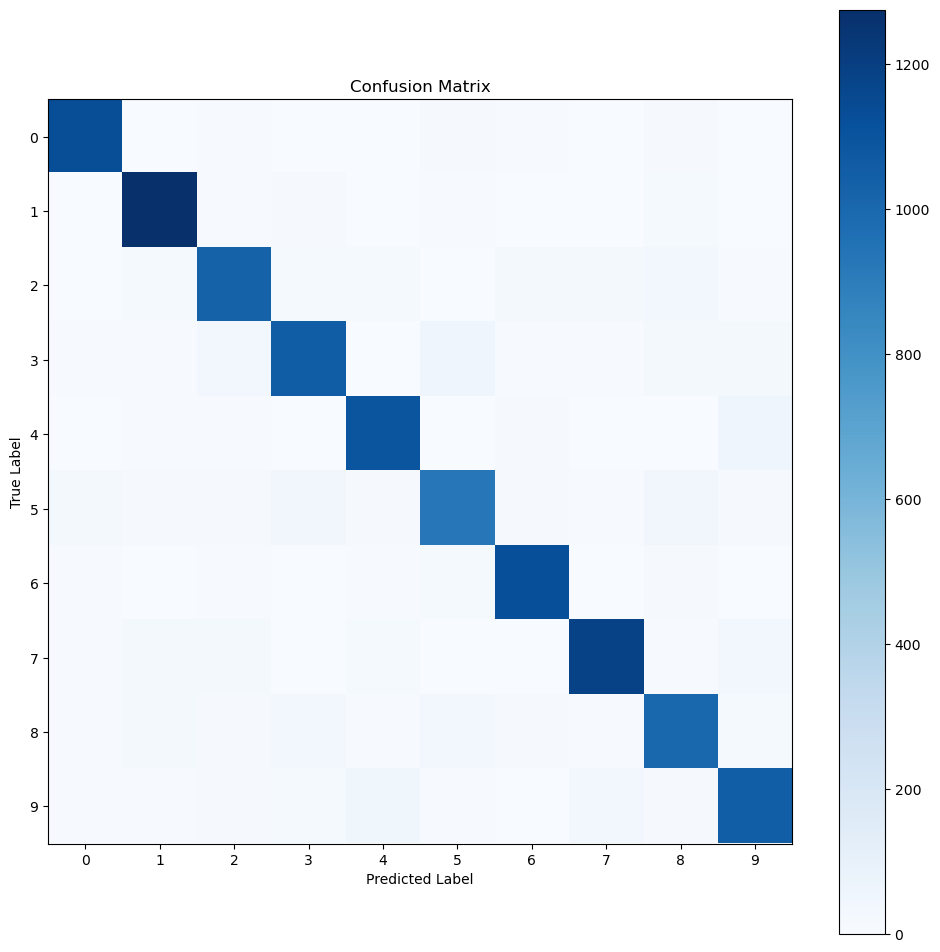

In [31]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
def evaluate_classification(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    return cm, precision, recall, f1

# Predict on test set
y_pred_test = predict_softmax(X_test, W_opt, b_opt)
y_test_labels = np.argmax(y_test_onehot, axis=1)
cm, precision, recall, f1 = evaluate_classification(y_test_labels, y_pred_test)

# Print metrics
print("\nConfusion Matrix:")
print(cm)
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

# Plot confusion matrix
plt.figure(figsize=(12, 12))
plt.imshow(cm, cmap='Blues')
plt.colorbar()
plt.xticks(range(10))
plt.yticks(range(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

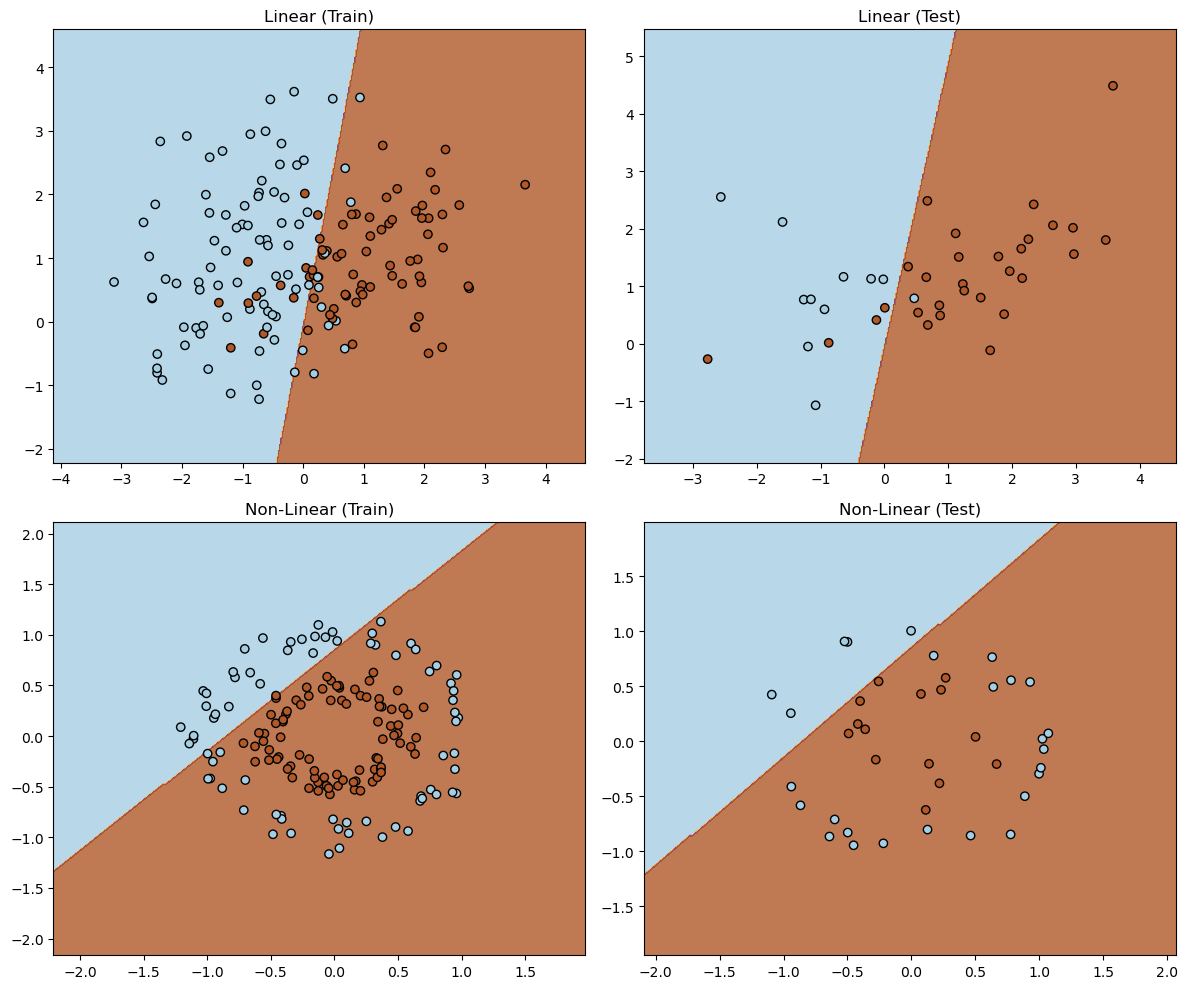

In [32]:
# Re-implement provided code for linear/non-linear data
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification, make_circles
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

np.random.seed(42)
X_linear, y_linear = make_classification(n_samples=200, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1)
X_train_linear, X_test_linear, y_train_linear, y_test_linear = train_test_split(X_linear, y_linear, test_size=0.2)

logistic_linear = LogisticRegression().fit(X_train_linear, y_train_linear)

X_non_linear, y_non_linear = make_circles(n_samples=200, noise=0.1, factor=0.5)
X_train_non, X_test_non, y_train_non, y_test_non = train_test_split(X_non_linear, y_non_linear, test_size=0.2)

logistic_non = LogisticRegression().fit(X_train_non, y_train_non)

# Plotting code (as provided)
def plot_decision_boundary(ax, model, X, y, title):
    h = 0.02
    x_min, x_max = X[:, 0].min()-1, X[:, 0].max()+1
    y_min, y_max = X[:, 1].min()-1, X[:, 1].max()+1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Paired)
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
    ax.set_title(title)

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
plot_decision_boundary(axes[0, 0], logistic_linear, X_train_linear, y_train_linear, 'Linear (Train)')
plot_decision_boundary(axes[0, 1], logistic_linear, X_test_linear, y_test_linear, 'Linear (Test)')
plot_decision_boundary(axes[1, 0], logistic_non, X_train_non, y_train_non, 'Non-Linear (Train)')
plot_decision_boundary(axes[1, 1], logistic_non, X_test_non, y_test_non, 'Non-Linear (Test)')
plt.tight_layout()
plt.show()